# TEXT
    

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%pylab inline
import copy
from googletrans import Translator
import pandas as pd
import numpy as np
import csv
import re
import jieba
import time
import json
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model
from sklearn.externals import joblib
from nltk.corpus import stopwords as e_stopwords
from datetime import datetime, timedelta
import jieba
import sys

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

Populating the interactive namespace from numpy and matplotlib


C:\Users\DELL\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'copy', 'datetime', 'stem']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [12]:
train1= pd.read_csv("G:\\preprocessed_1.csv")

In [13]:
train2= pd.read_csv("G:\\preprocessed_2.csv")

In [14]:
frames=[train1,train2]
train=pd.concat(frames)

In [15]:
train.shape[0]

1223517

In [164]:
translated=train[100000:200000]

## TEXT PREPROCESSING
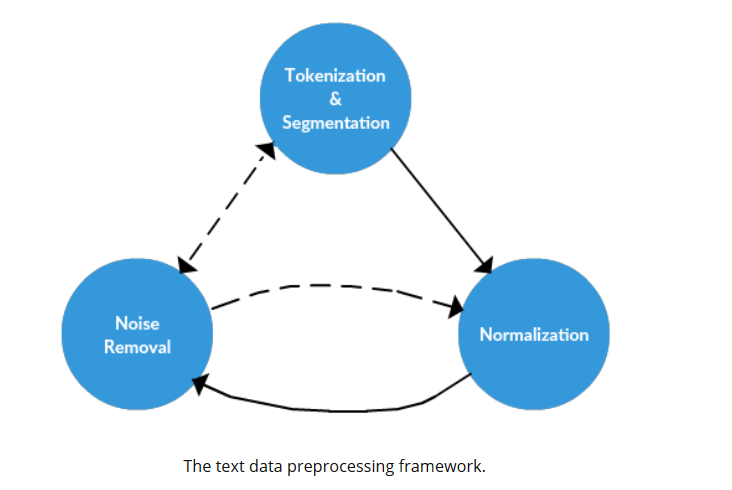

## REMOVAL OF NOISE - URL

In [165]:
def remurl(content):
    try:
        URLless_string = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', content)
        return URLless_string
    except Exception as e:
        print(str(e))
        return content
    

In [166]:
df_urlrem = pd.DataFrame(columns=['en_contenturl','url_rem'])
for i in range(100000):
    non_emo=translated['en_content'].iloc[i]
    content=translated['en_content'].iloc[i]
    new_content=remurl(content)
    
    df_urlrem = df_urlrem.append({'en_contenturl': non_emo,'url_rem':new_content}, ignore_index=True)

expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object


# Removal of numbers

In [167]:
 def rem_num(tokens):
        try:
            for item in tokens:
                if item.isdigit():    
                    tokens.remove(item)
            return tokens
        except Exception as e:
            print(str(e))
            return tokens

In [168]:
df_remnum = pd.DataFrame(columns=['url_rem',])
for i in range(100000):
    content=df_urlrem['url_rem'].iloc[i]
    nonum=rem_num(df_urlrem['url_rem'].iloc[i])
    list1=[content,nonum]
    df_remnum = df_remnum.append({'url_rem': content, 'no_num': nonum}, ignore_index=True)

    

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'float' object is not iterable
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 're

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'float' object is not iterable
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 're

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'float' object is not iterable
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 're

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attri

In [169]:
df_remnum

,url_rem,no_num
0,4G signal in the vicinity of Guangdong Mobile ...,4G signal in the vicinity of Guangdong Mobile ...
1,I'm hungry,I'm hungry
2,15 top-level multi-threaded Java interview que...,15 top-level multi-threaded Java interview que...
3,As long as there are benefits to enjoy liter l...,As long as there are benefits to enjoy liter l...
4,We do not want that casualties occurred [candl...,We do not want that casualties occurred [candl...
5,"Home sink leaks, repair personnel recruited, a...","Home sink leaks, repair personnel recruited, a..."
6,# # Machine learning machine vision and the ch...,# # Machine learning machine vision and the ch...
7,Hey,Hey
8,Starting my TNF50!,Starting my TNF50!
9,"""Whiplash it should be several Oscar nominated...","""Whiplash it should be several Oscar nominated..."


## REMOVAL OF STOPWORDS

In [170]:
remStopword=pd.DataFrame()

In [171]:
def removeStopwords(data):
    stopw="STOPWORDS.txt"
    stop_words = set(stopwords.words('english')) 
    words = word_tokenize(data)
    wordsFiltered = []
    try:
        for w in words:
            if (w not in stopw or w not in stop_words) :
                wordsFiltered.append(w)
        return wordsFiltered
    except Exception as e:
        print(str(e))
        return data

In [172]:
df_new = pd.DataFrame(columns=['no_num','Stopwrod_removed'])
for i in range(100000):
    non_emo=df_remnum['no_num'].iloc[i]
    letters_only = re.sub("[^a-zA-Z]"," ",str(df_remnum['no_num'].iloc[i]))
    remStopword=removeStopwords(letters_only)
    list1=[non_emo,remStopword]
    df_new = df_new.append({'no_num': non_emo, 'Stopword_removed': remStopword}, ignore_index=True)

KeyboardInterrupt: 

In [121]:
df_new.drop(['Stopwrod_removed'], axis=1)

,no_num,Stopword_removed
0,Lijiang Tourism (sz002033) # ## stock stocks F...,"[Lijiang, Tourism, sz, stock, stocks, Finance,..."
1,Chen Ling Ding # # red envelopes to make money...,"[Chen, Ling, Ding, red, envelopes, to, make, m..."
2,Taobao these sucker. . . Industrial gas fire n...,"[Taobao, these, sucker, Industrial, gas, fire,..."
3,"Aspect can not say, you know everything [laugh...","[Aspect, can, not, say, you, know, everything,..."
4,Over 111 Zhang,"[Over, Zhang]"
5,Lifetime! My favorite up with the main body ho...,"[Lifetime, My, favorite, up, with, the, main, ..."
6,On Uniqlo dressing room sound insulation is go...,"[On, Uniqlo, dressing, room, sound, insulation..."
7,"So ordinary everyday scene, but also how much ...","[So, ordinary, everyday, scene, but, also, how..."
8,"Overheating of red # # xxiii, Tanggua children...","[Overheating, of, red, xxiii, Tanggua, childre..."
9,There are good things to share with you! Flash...,"[There, are, good, things, to, share, with, yo..."


## STEMMING

In [122]:
import nltk
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()


In [123]:
def stemming(tokens):
    # First Word tokenization
    nltk_tokens =tokens 
    stem = []
    #Next find the roots of the word
    try:
        for w in nltk_tokens:
            s=porter_stemmer.stem(w)
            stem.append(s)
        return stem
    except Exception as e:
        print(str(e))
        return tokens

In [124]:
df_stem = pd.DataFrame(columns=['en_contentst','Stemming'])
for i in range(100000):
    content=df_new['Stopword_removed'].iloc[i]
    stem=stemming(df_new['Stopword_removed'].iloc[i])
    list1=[content,stem]
    df_stem = df_stem.append({'en_contentst': content, 'Stemming': stem}, ignore_index=True)

In [133]:
df_stem

,en_contentst,Stemming
0,"[Lijiang, Tourism, sz, stock, stocks, Finance,...","[lijiang, tourism, sz, stock, stock, financ, i..."
1,"[Chen, Ling, Ding, red, envelopes, to, make, m...","[chen, ling, ding, red, envelop, to, make, mon..."
2,"[Taobao, these, sucker, Industrial, gas, fire,...","[taobao, these, sucker, industri, ga, fire, no..."
3,"[Aspect, can, not, say, you, know, everything,...","[aspect, can, not, say, you, know, everyth, la..."
4,"[Over, Zhang]","[over, zhang]"
5,"[Lifetime, My, favorite, up, with, the, main, ...","[lifetim, My, favorit, up, with, the, main, bo..."
6,"[On, Uniqlo, dressing, room, sound, insulation...","[On, uniqlo, dress, room, sound, insul, is, go..."
7,"[So, ordinary, everyday, scene, but, also, how...","[So, ordinari, everyday, scene, but, also, how..."
8,"[Overheating, of, red, xxiii, Tanggua, childre...","[overh, of, red, xxiii, tanggua, children, sti..."
9,"[There, are, good, things, to, share, with, yo...","[there, are, good, thing, to, share, with, you..."


## LEMMATIZATION

In [134]:
###LEMMATIZATION
import nltk
from nltk.stem import WordNetLemmatizer

In [135]:
def lemmatization(tokens):
    wordnet_lemmatizer = WordNetLemmatizer()
    nltk_tokens =tokens 
    lem = []
    #Next find the roots of the word
    try:
        for w in nltk_tokens:
            l=wordnet_lemmatizer.lemmatize(w)
            lem.append(l)
        return lem
    except Exception as e:
        print(str(e))
        return tokens

In [136]:
df_lem = pd.DataFrame(columns=['Stemmingle','lemmatization'])
for i in range(100000):
    content=df_stem['Stemming'].iloc[i]
    lem=stemming(df_stem['Stemming'].iloc[i])
    list1=[content,lem]
    df_lem = df_lem.append({'Stemmingle': content, 'lemmatization': lem}, ignore_index=True)

In [137]:
df_lem

,Stemmingle,lemmatization
0,"[lijiang, tourism, sz, stock, stock, financ, i...","[lijiang, tourism, sz, stock, stock, financ, i..."
1,"[chen, ling, ding, red, envelop, to, make, mon...","[chen, ling, ding, red, envelop, to, make, mon..."
2,"[taobao, these, sucker, industri, ga, fire, no...","[taobao, these, sucker, industri, ga, fire, no..."
3,"[aspect, can, not, say, you, know, everyth, la...","[aspect, can, not, say, you, know, everyth, la..."
4,"[over, zhang]","[over, zhang]"
5,"[lifetim, My, favorit, up, with, the, main, bo...","[lifetim, My, favorit, up, with, the, main, bo..."
6,"[On, uniqlo, dress, room, sound, insul, is, go...","[On, uniqlo, dress, room, sound, insul, is, go..."
7,"[So, ordinari, everyday, scene, but, also, how...","[So, ordinari, everyday, scene, but, also, how..."
8,"[overh, of, red, xxiii, tanggua, children, sti...","[overh, of, red, xxiii, tanggua, children, sti..."
9,"[there, are, good, thing, to, share, with, you...","[there, are, good, thing, to, share, with, you..."


In [138]:
#nltk.download('wordnet')

## Converting to lower case

In [139]:
def tolower(tokens):
    try:
        nltk_tokens=tokens
        x = [element.lower() for element in nltk_tokens] 
        return x
    except Exception as e:
        print(str(e))
        return tokens


In [132]:
df_lower = pd.DataFrame(columns=['lemmatizationtl','lower'])
for i in range(100000):
    content=df_lem['lemmatization'].iloc[i]
    low=tolower(df_lem['lemmatization'].iloc[i])
    list1=[content,low]
    df_lower = df_lower.append({'lemmatizationtl': content, 'lower': low}, ignore_index=True)

    

In [140]:
df_lower

,lemmatizationtl,lower
0,"[lijiang, tourism, sz, stock, stock, financ, i...","[lijiang, tourism, sz, stock, stock, financ, i..."
1,"[chen, ling, ding, red, envelop, to, make, mon...","[chen, ling, ding, red, envelop, to, make, mon..."
2,"[taobao, these, sucker, industri, ga, fire, no...","[taobao, these, sucker, industri, ga, fire, no..."
3,"[aspect, can, not, say, you, know, everyth, la...","[aspect, can, not, say, you, know, everyth, la..."
4,"[over, zhang]","[over, zhang]"
5,"[lifetim, My, favorit, up, with, the, main, bo...","[lifetim, my, favorit, up, with, the, main, bo..."
6,"[On, uniqlo, dress, room, sound, insul, is, go...","[on, uniqlo, dress, room, sound, insul, is, go..."
7,"[So, ordinari, everyday, scene, but, also, how...","[so, ordinari, everyday, scene, but, also, how..."
8,"[overh, of, red, xxiii, tanggua, children, sti...","[overh, of, red, xxiii, tanggua, children, sti..."
9,"[there, are, good, thing, to, share, with, you...","[there, are, good, thing, to, share, with, you..."


In [99]:
## REMOVE PUNTUATION

In [142]:
 def rem_punctuation(tokens):
        try:
            input_text = ' '.join(tokens).lower()
            s = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", input_text)
            #print(input_text)
            words = word_tokenize(s)
            return words
        except Exception as e:
            print(str(e))
            return tokens

In [143]:
df_rempunc = pd.DataFrame(columns=['lemmatizationtlp','no_punc'])
for i in range(100000):
    content=df_lower['lemmatizationtl'].iloc[i]
    nopun=rem_punctuation(df_lower['lemmatizationtl'].iloc[i])
    list1=[content,nopun]
    df_rempunc = df_rempunc.append({'lemmatizationtlp': content, 'no_punc': nopun}, ignore_index=True)

In [144]:
df_rempunc

,lemmatizationtlp,no_punc
0,"[lijiang, tourism, sz, stock, stock, financ, i...","[lijiang, tourism, sz, stock, stock, financ, i..."
1,"[chen, ling, ding, red, envelop, to, make, mon...","[chen, ling, ding, red, envelop, to, make, mon..."
2,"[taobao, these, sucker, industri, ga, fire, no...","[taobao, these, sucker, industri, ga, fire, no..."
3,"[aspect, can, not, say, you, know, everyth, la...","[aspect, can, not, say, you, know, everyth, la..."
4,"[over, zhang]","[over, zhang]"
5,"[lifetim, My, favorit, up, with, the, main, bo...","[lifetim, my, favorit, up, with, the, main, bo..."
6,"[On, uniqlo, dress, room, sound, insul, is, go...","[on, uniqlo, dress, room, sound, insul, is, go..."
7,"[So, ordinari, everyday, scene, but, also, how...","[so, ordinari, everyday, scene, but, also, how..."
8,"[overh, of, red, xxiii, tanggua, children, sti...","[overh, of, red, xxiii, tanggua, children, sti..."
9,"[there, are, good, thing, to, share, with, you...","[there, are, good, thing, to, share, with, you..."


In [156]:
frames=[translated,df_urlrem, df_new, df_stem, df_lem, df_lower, df_remnum, df_rempunc]

In [157]:
Train=(pd.concat(frames, axis=1))

In [158]:
Train

,u_id,m_id,forward_count,comment_count,like_count,content,date,time,content_media_count,content_spchar,...,en_contentst,Stemming,Stemmingle,lemmatization,lemmatizationtl,lower,url_rem,no_num,lemmatizationtlp,no_punc
0,d38e9bed5d98110dc2489d0d1cac3c2a,7d45833d9865727a88b960b0603c19f6,0.0,0.0,0.0,丽江旅游(sz002033)#股票##炒股##财经##理财##投资#推荐包赢股，盈利对半分成...,2015-02-23,17:41:29,0.0,['(' ')' '#' '#' '#' '#' '#' '#' '#' ...,...,"[Lijiang, Tourism, sz, stock, stocks, Finance,...","[lijiang, tourism, sz, stock, stock, financ, i...","[lijiang, tourism, sz, stock, stock, financ, i...","[lijiang, tourism, sz, stock, stock, financ, i...","[lijiang, tourism, sz, stock, stock, financ, i...","[lijiang, tourism, sz, stock, stock, financ, i...",Lijiang Tourism (sz002033) # ## stock stocks F...,Lijiang Tourism (sz002033) # ## stock stocks F...,"[lijiang, tourism, sz, stock, stock, financ, i...","[lijiang, tourism, sz, stock, stock, financ, i..."
1,fa13974743d3fe6ff40d21b872325e9e,8169f1d45051e08ef213bf1106b1225d,0.0,0.0,0.0,#丁辰灵的红包#挣钱是一种能力，抢红包拼的是技术。我抢到了丁辰灵 和@阚洪岩 一起发出的现金...,2015-02-14,12:49:58,1.0,['#' '#' '，' '。' '@' '，' '！' '，' '╮' ...,...,"[Chen, Ling, Ding, red, envelopes, to, make, m...","[chen, ling, ding, red, envelop, to, make, mon...","[chen, ling, ding, red, envelop, to, make, mon...","[chen, ling, ding, red, envelop, to, make, mon...","[chen, ling, ding, red, envelop, to, make, mon...","[chen, ling, ding, red, envelop, to, make, mon...",Chen Ling Ding # # red envelopes to make money...,Chen Ling Ding # # red envelopes to make money...,"[chen, ling, ding, red, envelop, to, make, mon...","[chen, ling, ding, red, envelop, to, make, mon..."
2,da534fe87e7a52777bee5c30573ed5fd,68cd0258c31c2c525f94febea2d9523b,0.0,0.0,0.0,淘宝网这些傻逼。。。气的劳资有火没地儿发~尼玛，你们都瞎了,2015-03-31,13:58:06,0.0,['。' '。' '。' '~' '，'],...,"[Taobao, these, sucker, Industrial, gas, fire,...","[taobao, these, sucker, industri, ga, fire, no...","[taobao, these, sucker, industri, ga, fire, no...","[taobao, these, sucker, industri, ga, fire, no...","[taobao, these, sucker, industri, ga, fire, no...","[taobao, these, sucker, industri, ga, fire, no...",Taobao these sucker. . . Industrial gas fire n...,Taobao these sucker. . . Industrial gas fire n...,"[taobao, these, sucker, industri, ga, fire, no...","[taobao, these, sucker, industri, ga, fire, no..."
3,e06a22b7e065e559a1f0bf7841a85c51,00b9f86b4915aedb7db943c54fd19d59,0.0,4.0,3.0,看点不能说的，你们都懂[笑cry],2015-06-11,20:39:57,0.0,['，' '[' ']'],...,"[Aspect, can, not, say, you, know, everything,...","[aspect, can, not, say, you, know, everyth, la...","[aspect, can, not, say, you, know, everyth, la...","[aspect, can, not, say, you, know, everyth, la...","[aspect, can, not, say, you, know, everyth, la...","[aspect, can, not, say, you, know, everyth, la...","Aspect can not say, you know everything [laugh...","Aspect can not say, you know everything [laugh...","[aspect, can, not, say, you, know, everyth, la...","[aspect, can, not, say, you, know, everyth, la..."
4,f9828598f9664d4e347ef2048ce17734,c7f6f66044c0c5a3330e2c5371be6824,0.0,0.0,0.0,111多张,2015-03-10,18:02:38,0.0,[],...,"[Over, Zhang]","[over, zhang]","[over, zhang]","[over, zhang]","[over, zhang]","[over, zhang]",Over 111 Zhang,Over 111 Zhang,"[over, zhang]","[over, zhang]"
5,d80f3d3c5c1d658e82b837a4dd1af849,bfc0819b83ec59ce767287077f2b3507,0.0,0.0,0.0,有生之年！我最喜欢的up主跟我的三体勾搭到一起了！幸福感爆棚！ @黑桐谷歌 http://...,2015-02-13,01:09:41,1.0,['！' '！' '！' '@' ':' '/' '/' '.' '/'],...,"[Lifetime, My, favorite, up, with, the, main, ...","[lifetim, My, favorit, up, with, the, main, bo...","[lifetim, My, favorit, up, with, the, main, bo...","[lifetim, My, favorit, up, with, the, main, bo...","[lifetim, My, favorit, up, with, the, main, bo...","[lifetim, my, favorit, up, with, the, main, bo...",Lifetime! My favorite up with the main body ho...,Lifetime! My favorite up with the main body ho...,"[lifetim, My, favorit, up, with, the, main, bo...","[lifetim, my, favorit, up, with, the, main, bo..."
6,f349a67d1cd7c8683c5bbc5f8486e1

In [160]:
Train.shape[0]

100000

In [161]:
Train.to_csv("G://preprocessed2L.csv", sep=',',index=False, encoding= 'utf-8')

In [162]:
df=pd.read_csv("G://preprocessed2L.csv")

In [163]:
df

,u_id,m_id,forward_count,comment_count,like_count,content,date,time,content_media_count,content_spchar,...,en_contentst,Stemming,Stemmingle,lemmatization,lemmatizationtl,lower,url_rem.1,no_num.1,lemmatizationtlp,no_punc
0,d38e9bed5d98110dc2489d0d1cac3c2a,7d45833d9865727a88b960b0603c19f6,0.0,0.0,0.0,丽江旅游(sz002033)#股票##炒股##财经##理财##投资#推荐包赢股，盈利对半分成...,2015-02-23,17:41:29,0.0,['(' ')' '#' '#' '#' '#' '#' '#' '#' ...,...,"['Lijiang', 'Tourism', 'sz', 'stock', 'stocks'...","['lijiang', 'tourism', 'sz', 'stock', 'stock',...","['lijiang', 'tourism', 'sz', 'stock', 'stock',...","['lijiang', 'tourism', 'sz', 'stock', 'stock',...","['lijiang', 'tourism', 'sz', 'stock', 'stock',...","['lijiang', 'tourism', 'sz', 'stock', 'stock',...",Lijiang Tourism (sz002033) # ## stock stocks F...,Lijiang Tourism (sz002033) # ## stock stocks F...,"['lijiang', 'tourism', 'sz', 'stock', 'stock',...","['lijiang', 'tourism', 'sz', 'stock', 'stock',..."
1,fa13974743d3fe6ff40d21b872325e9e,8169f1d45051e08ef213bf1106b1225d,0.0,0.0,0.0,#丁辰灵的红包#挣钱是一种能力，抢红包拼的是技术。我抢到了丁辰灵 和@阚洪岩 一起发出的现金...,2015-02-14,12:49:58,1.0,['#' '#' '，' '。' '@' '，' '！' '，' '╮' ...,...,"['Chen', 'Ling', 'Ding', 'red', 'envelopes', '...","['chen', 'ling', 'ding', 'red', 'envelop', 'to...","['chen', 'ling', 'ding', 'red', 'envelop', 'to...","['chen', 'ling', 'ding', 'red', 'envelop', 'to...","['chen', 'ling', 'ding', 'red', 'envelop', 'to...","['chen', 'ling', 'ding', 'red', 'envelop', 'to...",Chen Ling Ding # # red envelopes to make money...,Chen Ling Ding # # red envelopes to make money...,"['chen', 'ling', 'ding', 'red', 'envelop', 'to...","['chen', 'ling', 'ding', 'red', 'envelop', 'to..."
2,da534fe87e7a52777bee5c30573ed5fd,68cd0258c31c2c525f94febea2d9523b,0.0,0.0,0.0,淘宝网这些傻逼。。。气的劳资有火没地儿发~尼玛，你们都瞎了,2015-03-31,13:58:06,0.0,['。' '。' '。' '~' '，'],...,"['Taobao', 'these', 'sucker', 'Industrial', 'g...","['taobao', 'these', 'sucker', 'industri', 'ga'...","['taobao', 'these', 'sucker', 'industri', 'ga'...","['taobao', 'these', 'sucker', 'industri', 'ga'...","['taobao', 'these', 'sucker', 'industri', 'ga'...","['taobao', 'these', 'sucker', 'industri', 'ga'...",Taobao these sucker. . . Industrial gas fire n...,Taobao these sucker. . . Industrial gas fire n...,"['taobao', 'these', 'sucker', 'industri', 'ga'...","['taobao', 'these', 'sucker', 'industri', 'ga'..."
3,e06a22b7e065e559a1f0bf7841a85c51,00b9f86b4915aedb7db943c54fd19d59,0.0,4.0,3.0,看点不能说的，你们都懂[笑cry],2015-06-11,20:39:57,0.0,['，' '[' ']'],...,"['Aspect', 'can', 'not', 'say', 'you', 'know',...","['aspect', 'can', 'not', 'say', 'you', 'know',...","['aspect', 'can', 'not', 'say', 'you', 'know',...","['aspect', 'can', 'not', 'say', 'you', 'know',...","['aspect', 'can', 'not', 'say', 'you', 'know',...","['aspect', 'can', 'not', 'say', 'you', 'know',...","Aspect can not say, you know everything [laugh...","Aspect can not say, you know everything [laugh...","['aspect', 'can', 'not', 'say', 'you', 'know',...","['aspect', 'can', 'not', 'say', 'you', 'know',..."
4,f9828598f9664d4e347ef2048ce17734,c7f6f66044c0c5a3330e2c5371be6824,0.0,0.0,0.0,111多张,2015-03-10,18:02:38,0.0,[],...,"['Over', 'Zhang']","['over', 'zhang']","['over', 'zhang']","['over', 'zhang']","['over', 'zhang']","['over', 'zhang']",Over 111 Zhang,Over 111 Zhang,"['over', 'zhang']","['over', 'zhang']"
5,d80f3d3c5c1d658e82b837a4dd1af849,bfc0819b83ec59ce767287077f2b3507,0.0,0.0,0.0,有生之年！我最喜欢的up主跟我的三体勾搭到一起了！幸福感爆棚！ @黑桐谷歌 http://...,2015-02-13,01:09:41,1.0,['！' '！' '！' '@' ':' '/' '/' '.' '/'],...,"['Lifetime', 'My', 'favorite', 'up', 'with', '...","['lifetim', 'My', 'favorit', 'up', 'with', 'th...","['lifetim', 'My', 'favorit', 'up', 'with', 'th...","['lifetim', 'My', 'favorit', 'up', 'with', 'th...","['lifetim', 'My', 'favorit', 'up', 'with', 'th...","['lifetim', 'my', 'favorit', 'up', 'with', 'th...",Lifetime! My favorite up with the main body ho...,Lifetime! My favorite up with the main body ho...,"['lifetim', 'My', 'favorit', 'up', 'with', 'th...","['lifetim', 'my', 'favorit', 'up', 'with', 'th.